In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
data = pd.read_csv("./movies.csv")

In [3]:
data.head()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,1,70136369,Ferris Bueller's Day Off,PG-13,2,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
data.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'genre_encoded',
       'gross', 'name', 'rating', 'rating_encoded', 'released', 'runtime',
       'score', 'star', 'votes', 'writer', 'year released'],
      dtype='object')

In [5]:
data.isnull().sum(axis=0) # checked to make sure there is no missing data

budget            0
company           0
country           0
director          0
genre             0
genre_encoded     0
gross             0
name              0
rating            0
rating_encoded    0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year released     0
dtype: int64

In [6]:
movies_before_2000 = data[data['year released'] < 2000]
print("There are " + str(len(movies_before_2000)) + " movies from the dataset that were released before 2000.")
movies_before_2000.tail()

There are 3080 movies from the dataset that were released before 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
3075,0,3B Productions,France,Bruno Dumont,Drama,3,113495,Humanité,Not specified,5,1999-10-27,148,6.9,Emmanuel Schotté,3105,Bruno Dumont,1999
3076,0,C.E.O. Films,USA,George Haas,Drama,3,94633,Friends & Lovers,R,3,1999-04-16,100,4.5,Stephen Baldwin,1330,Neill Barry,1999
3077,312000,Spanky Pictures,USA,Gavin O'Connor,Drama,3,1281176,Tumbleweeds,PG-13,2,2000-03-03,102,6.7,Janet McTeer,3018,Angela Shelton,1999
3078,0,Cinerenta Medienbeteiligungs KG,USA,Scott Elliott,Drama,3,544538,A Map of the World,R,3,2000-01-21,125,6.7,Sigourney Weaver,3659,Jane Hamilton,1999
3079,7500000,Code Productions,USA,Robert Marcarelli,Action,2,12614346,The Omega Code,PG-13,2,1999-08-27,100,3.5,Casper Van Dien,4762,Stephan Blinn,1999


In [7]:
movies_2000_and_after = data[data['year released'] >= 2000]
print("There are " + str(len(movies_2000_and_after)) + " movies from the dataset that were released after 2000.")
movies_2000_and_after.tail()

There are 3740 movies from the dataset that were released after 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


# Question 1:
## Part 1 What is the relationship between movie budget and revenue (gross), 
## Part 2: and is that relationship different for movies that came out before 2000 compared to movies that came out after 2000?

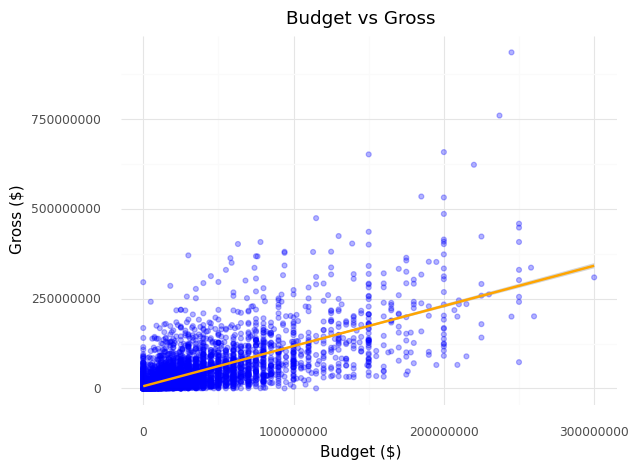

<ggplot: (320043460)>

In [8]:
(ggplot(data, aes(x = 'budget', y = 'gross')) 
 + geom_point(colour = 'blue', alpha = 0.30) 
 + theme_minimal() + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm", colour = 'orange')
)

# Question 1 Discussion Part 1
## What is the (general) relationship between movie budget and revenue (gross)?
- To understand the relationship between a movie's budget and its gross, we created the scatter plot above. The scatter plot has budget on the x-axis and gross on the y-axis. Budget is on the x-axis because it is the predictor variable (AKA independent variable) and gross is on the y-axis because it is the outcome we are analyzing based on the budget. We can observe that generally as x (budget) increases, we can expect the y (gross) value to increase. To confirm this trend, we added a best fit linear regression line. The regression line aligns with our observation that as x increases, we can expect y to increase because the slope of the regression line is positive and greater than 1. This is because the slope is slanted upwards. This slope that is positive and greater than 1 indicates that the relationship between budget and revenue is a positive linear relationship. 
- Our results are not too suprising because it makes sense for a movie to make more money (gross) if the movie's producers have more money (budget). Having a higher budget allows movie producers to have more resources, experiment with different ideas, and ultimately gives them a lot more opportunities to make a more successful (in terms of gross) movie. 
- We are curious about whether this positive linear relationship is similar or different across movies made before 2000 vs movies made 2000 and after. We dive into this in the next question.

In [9]:
# labsList = ['Movies Released Before 2000', 'Movies Released 2000 and After']
year_assignments = []
for i in data['year released']:
    if i >= 2000:
        year_assignments.append(1)
    else:
        year_assignments.append(0)
len(year_assignments)

6820

In [10]:
data['year_assignments'] = year_assignments
data.tail()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,1
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,1
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,1
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,1
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,1


In [11]:
labsList = ["Cluster " + str(i) for i in year_assignments]
label_titles = ['Movies Released Before 2000', 'Movies Released 2000 and After']
print("Testing out the labsList list: ")
print(labsList[1000])
print(labsList[6000])

Testing out the labsList list: 
Cluster 0
Cluster 1


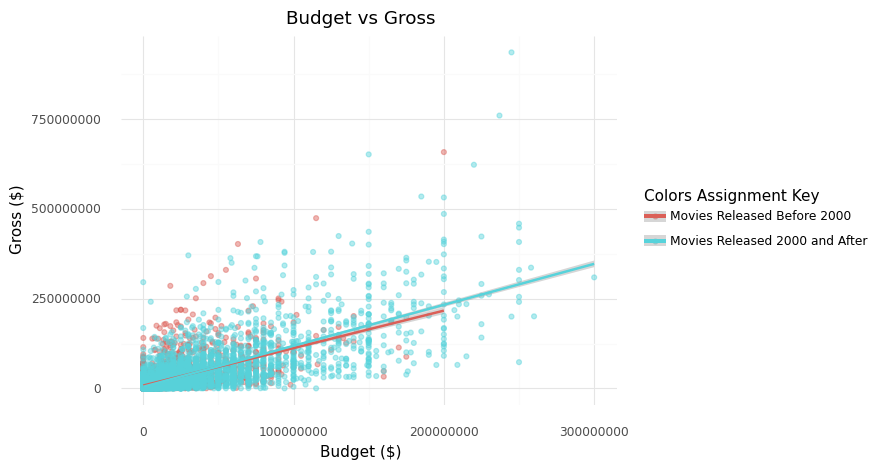

<ggplot: (320229617)>

In [12]:
(ggplot(data, aes(x = 'budget', y = 'gross', colour = "factor(year_assignments)")) 
 + geom_point(alpha = 0.45) 
 + theme_minimal() 
 + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm")
 + scale_color_discrete(name = "Colors Assignment Key",
                       labels = label_titles)
)

# Question 1 Discussion Part 2
## Is the relationship between movie budget and revenue (gross) different for movies that came out before 2000 compared to movies that came out after 2000?
- To understand if the relationship between budget and gross are different among movies made before 2000 vs movies made 2000 and after, we created another scatter plot. Once again, the x-axis is budget and the y-axis is gross. The main difference in this graph is that the 2 groups (movies before 2000s and movies 2000s+) are distinguised by different colors. The salmon/pink colored data points represent movies that were made before 2000. The light/sky blue color data points represent movies that were made 2000 and beyond. Each of the groups have their own best fit regression lines and are colored relative to their group colors. 
- We can see from the graph above, that 2 groups have very similar results. Both regression lines are positive and greater than 1 because they are slanted up and continue to go up as budget increases. These results suggest that we generally we can expect a movie's gross to increase as its budget increases. 
- Although the regression lines are very similar, it should be noted that the group of movies released in 2000 and after is higher (in terms of gross) than the other regression line. This is most likely due to the fact that movies made 2000s and after are much more likely to have made more money/gross compared to movies made before 2000. This is not too suprising because the movie industry and its audience grows significantly over years especially over the last couple of years. Inflation may also be another reason as to why the movies made 2000 and after have a higher regression line. 

## Question 1 Explicit Answers to Parts 1 and 2

### Part 1: What is the (general) relationship between movie budget and revenue (gross)?
- **The relationship between movie budget and revenue is positive linear relationship. Generally, as a movie's budget increases, we can expect its respected gross to increase as well.**

### Part 2: Is the relationship between movie budget and revenue (gross) different for movies that came out before 2000 compared to movies that came out after 2000?
- **The relationship between movie budget and revenue is not different, except that for the movies made in 2000 and after CAN (not necessarily always) have higher grosses.**

# Question 2

## Using the number of user votes as a proxy for movie popularity, are certain genres, (action, drama, and adventure),  of movies more popular than others?

### Part 1: Boxplot of users votes across different genres
### Part 2: Barplot of average number of user votes across different genres
### Part 3: Barplot of count of movies from dataset across different genres

In [13]:
print("The dataset contains all of these genres: \n")
for i in data['genre'].unique():
    print(i)
print("\n")
print("However, we are only interested in action, drama, and adventure for this question.")

The dataset contains all of these genres: 

Adventure
Comedy
Action
Drama
Crime
Thriller
Horror
Animation
Biography
Sci-Fi
Musical
Family
Fantasy
Mystery
War
Romance
Western


However, we are only interested in action, drama, and adventure for this question.


In [14]:
print("All of the movies that are considered an action, drama, or adventure genre\nare found and then stored in the variable called data_genre_filtered")
desired_genres = ['Action', 'Adventure', 'Drama']
data_genre_filtered = data[data['genre'].isin(desired_genres)]
data_genre_filtered.head()

All of the movies that are considered an action, drama, or adventure genre
are found and then stored in the variable called data_genre_filtered


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0
5,6000000,Hemdale,UK,Oliver Stone,Drama,3,138530565,Platoon,R,3,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,0


In [40]:
action_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Action']['votes'].median()
adventure_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Adventure']['votes'].median()
drama_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Drama']['votes'].median()
median_user_votes = data_genre_filtered['votes'].median()

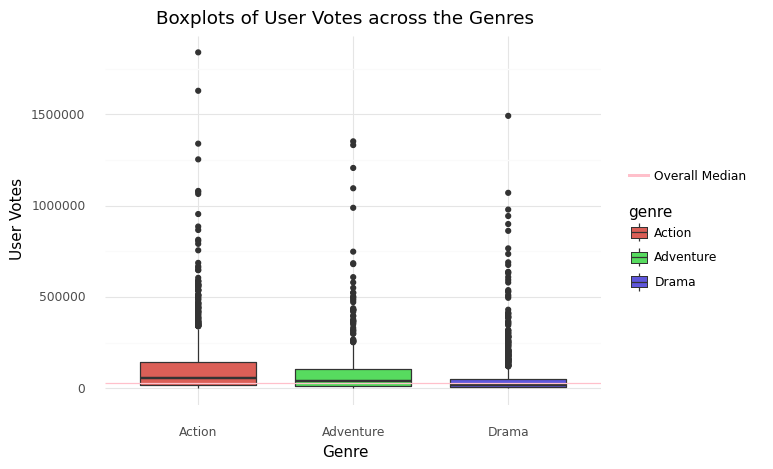

<ggplot: (320626981)>

In [61]:
(ggplot(data_genre_filtered, aes(x = 'genre', y='votes', fill = "genre")) 
 + geom_boxplot(stat = "boxplot") 
 + theme_minimal() 
 + ggtitle("Boxplots of User Votes across the Genres") 
 + labs(x = "Genre", y = "User Votes")
 + geom_hline(aes(yintercept = median_user_votes, color=["Overall Median"]), show_legend=True)
 + scale_color_manual(values="pink",name=' ')
)

In [38]:
print("The median number of user votes for Action movies is:\n" + str(action_median_user_votes) + "\n")
print("The median number of user votes for Adventure movies is:\n" + str(adventure_median_user_votes)+ "\n")
print("The median number of user votes for Drama movies is:\n" + str(drama_median_user_votes)+ "\n")

The median number of user votes for Action movies is:
55046.0

The median number of user votes for Adventure movies is:
39098.5

The median number of user votes for Drama movies is:
16435.5



# Question 2 Part 1 Discussion
- We created a boxplot (shown above) to help us gain insight or a better understanding of the user votes variability across the 3 different genres of interest (Action - red, Adventure - green, Drama - blue). The boxplot above is an effective visualization of the distribution of user votes for each genre because it allows us to see the shape of the distribution of the data. The black horizontal lines within each box represent the median (value separating the higher half from the lower half of a data sample) number of user votes for that genre. We can observe that the medians for each category is very small compared to the high points that fall out of their box's container. The pink line represents the median number of votes across all 3 genres. This overall median value is small like each genre's median which what we expect given the small medians for each genre. 
- These observations tell us that the large majority of movies do not have a great amount of votes. The very high user votes values across the different genres are outliers because these movies performed exceptionally well in regards to user votes. 
- The size of the boxes provide us with insight in terms of the amount of variability observed in each genre. Generally speaking, the larger a box is of a boxplot means that there is more variability of data in that sample. The Action genre has the largest box of all 3 boxes above, which indicates that Action genres have greater variability in terms of user votes. Adventure has the second most variability and drama has the least variability of these 3 genres.
- We cannot draw any concrete conslusions with this knowledge but it is insightful to learn and expand upon to gain a better overall understanding of the data. For example, perhaps Action has the largest amount of variability because there are a lot of action movies. If there are a lot of movies in a certain genre, it may be more difficult for smaller movies of that genre to stand out and get user votes. To gain a better understanding of the different genres, we create barplots of the data next.

In [16]:
# init dict that will hold avg votes for each desired genre
user_votes_genres = {
    "Action": {
        "avg_user_votes": 0,
        "genre": 'Action',
        "count": 0
    },
    "Adventure": {
        "avg_user_votes": 0,
        "genre": "Adventure",
        "count": 0
    },
    "Drama": {
        "avg_user_votes": 0,
        "genre": "Drama",
        "count": 0
    }
}

# populate dict with avg votes for each genre
for key in user_votes_genres:
    user_votes_genres[key]['avg_user_votes'] = np.mean(data_genre_filtered[data_genre_filtered['genre'] == key]['votes'])
    user_votes_genres[key]['count'] = len(data_genre_filtered[data_genre_filtered['genre'] == key])
user_votes_genres

{'Action': {'avg_user_votes': 112157.26897069873,
  'genre': 'Action',
  'count': 1331},
 'Adventure': {'avg_user_votes': 106109.04081632652,
  'genre': 'Adventure',
  'count': 392},
 'Drama': {'avg_user_votes': 53389.16966759003,
  'genre': 'Drama',
  'count': 1444}}

In [17]:
# plt.bar(avg_user_votes_genres.keys(), avg_user_votes_genres.values())
DF_user_votes_genres = pd.DataFrame.from_dict(user_votes_genres, orient = 'index')
DF_user_votes_genres

,avg_user_votes,genre,count
Action,112157.268971,Action,1331
Adventure,106109.040816,Adventure,392
Drama,53389.169668,Drama,1444


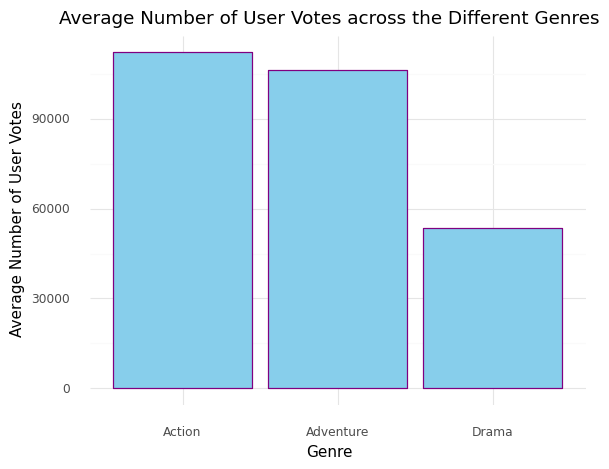

<ggplot: (316709386)>

In [18]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='avg_user_votes')) + geom_bar(stat = "identity", color = "purple", fill="skyblue") + theme_minimal() + ggtitle("Average Number of User Votes across the Different Genres") + labs(x = "Genre", y = "Average Number of User Votes"))

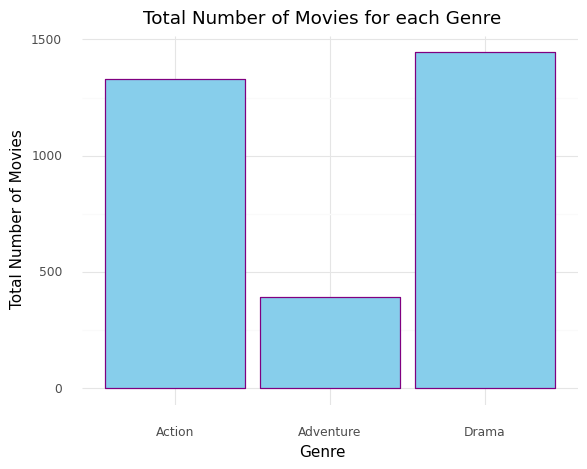

<ggplot: (316708130)>

In [19]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='count')) + geom_bar(stat = "identity", color = "purple", fill="skyblue") + theme_minimal() + ggtitle("Total Number of Movies for each Genre") + labs(x = "Genre", y = "Total Number of Movies"))

## Anaylsis Plan
## TODO

# Question 6

## What is the minimum number of features needed to predict whether a movie will gross over 250K and over 500K with at least 70% explained variance? 

In [20]:
cont_features = ['budget', 'runtime', 'score', 'votes', 'year released', 'gross']
cont_predictors = ['budget', 'runtime', 'score', 'votes', 'year released']

In [21]:
data_gross_cont_filtered = data[cont_features]
data_gross_cont_filtered.tail()

,budget,runtime,score,votes,year released,gross
6815,0,91,5.4,9161,2016,4750497
6816,0,90,4.9,1959,2016,28368
6817,3500000,76,6.5,36333,2016,3775000
6818,0,76,6.2,6947,2016,25981
6819,0,120,6.7,2411,2016,37757


In [22]:
z = StandardScaler()
gross_over_250k = []
gross_over_500k = []
for i in data_gross_cont_filtered['gross']:
    if i > 250000:
        gross_over_250k.append(1)
    else:
        gross_over_250k.append(0)
    if i > 500000:
        gross_over_500k.append(1)
    else:
        gross_over_500k.append(0)

print(len(gross_over_250k))
print(len(gross_over_500k))

6820
6820


In [23]:
data_gross_cont_filtered['gross_over_250k'] = gross_over_250k
data_gross_cont_filtered['gross_over_500k'] = gross_over_500k
data_gross_cont_filtered.tail(8)

,budget,runtime,score,votes,year released,gross,gross_over_250k,gross_over_500k
6812,0,96,5.7,4439,2016,23020,0,0
6813,0,120,6.2,6054,2016,228894,0,0
6814,20000000,107,6.3,19084,2016,36874745,1,1
6815,0,91,5.4,9161,2016,4750497,1,1
6816,0,90,4.9,1959,2016,28368,0,0
6817,3500000,76,6.5,36333,2016,3775000,1,1
6818,0,76,6.2,6947,2016,25981,0,0
6819,0,120,6.7,2411,2016,37757,0,0


## PCA Models:

### PCA Model for predicting gross over 250K

In [24]:
PCA_LR_Model_250k = LogisticRegression() # init an empty Logistic Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_250k, PCA_LR_X_test_250k, PCA_LR_y_train_250k, PCA_LR_y_test_250k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_250k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_250k[cont_predictors] = z.fit_transform(PCA_LR_X_train_250k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_250k[cont_predictors] = z.transform(PCA_LR_X_test_250k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_250k = PCA()
PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA()

In [25]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_250k = PCA_Model_250k.transform(PCA_LR_X_train_250k)
PCA_LR_X_test_250k = PCA_Model_250k.transform(PCA_LR_X_test_250k)

# apply PCA to the training set
PCA_LR_Model_250k.fit(PCA_LR_X_train_250k, PCA_LR_y_train_250k) # fit the X and y training data to the LR model

PCA_LR_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_test_250k)

PCA_LR_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)
PCA_LR_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

print("PCA Logistic Regression Model ~ Mean Squared Error:\n" + str(PCA_LR_mse_250k) + "\n")
print("PCA Logistic Regression Model ~ r2 score:\n" + str(PCA_LR_r2_250k))

PCA Logistic Regression Model ~ Mean Squared Error:
0.1187683284457478

PCA Logistic Regression Model ~ r2 score:
-0.12280487804878026


### PCA Model for predicting gross over 500K

In [26]:
PCA_LR_Model_500k = LogisticRegression() # init an empty Logistic Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_500k, PCA_LR_X_test_500k, PCA_LR_y_train_500k, PCA_LR_y_test_500k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_500k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_500k[cont_predictors] = z.fit_transform(PCA_LR_X_train_500k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_500k[cont_predictors] = z.transform(PCA_LR_X_test_500k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_500k = PCA()
PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA()

In [27]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_500k = PCA_Model_250k.transform(PCA_LR_X_train_500k)
PCA_LR_X_test_500k = PCA_Model_250k.transform(PCA_LR_X_test_500k)

# apply PCA to the training set
PCA_LR_Model_500k.fit(PCA_LR_X_train_500k, PCA_LR_y_train_500k) # fit the X and y training data to the LR model

PCA_LR_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_test_500k)

PCA_LR_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)
PCA_LR_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

print("PCA Logistic Regression Model ~ Mean Squared Error:\n" + str(PCA_LR_mse_500k) + "\n")
print("PCA Logistic Regression Model ~ r2 score:\n" + str(PCA_LR_r2_500k))

PCA Logistic Regression Model ~ Mean Squared Error:
0.14809384164222875

PCA Logistic Regression Model ~ r2 score:
-0.08679257190640732


## Creating Dataframes of Principle Components

### Principle Components Dataframe for model predicting gross over 250K:

In [28]:
PCA_DF_250k = pd.DataFrame({
    "Explained_Variance": PCA_Model_250k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_250k.explained_variance_ratio_.cumsum()
})

PCA_DF_250k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.419516,1,0.419516
1,0.219282,2,0.638798
2,0.159192,3,0.797991
3,0.130919,4,0.928910
4,0.071090,5,1.000000


### Principle Components Dataframe for model predicting gross over 500K:

In [29]:
PCA_DF_500k = pd.DataFrame({
    "Explained_Variance": PCA_Model_500k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_500k.explained_variance_ratio_.cumsum()
})

PCA_DF_500k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.420626,1,0.420626
1,0.219585,2,0.640211
2,0.159250,3,0.799461
3,0.129199,4,0.928661
4,0.071339,5,1.000000


## Creating the PCA Skree Plots

### PCA Skree Plots for Model predicting gross over 250K:

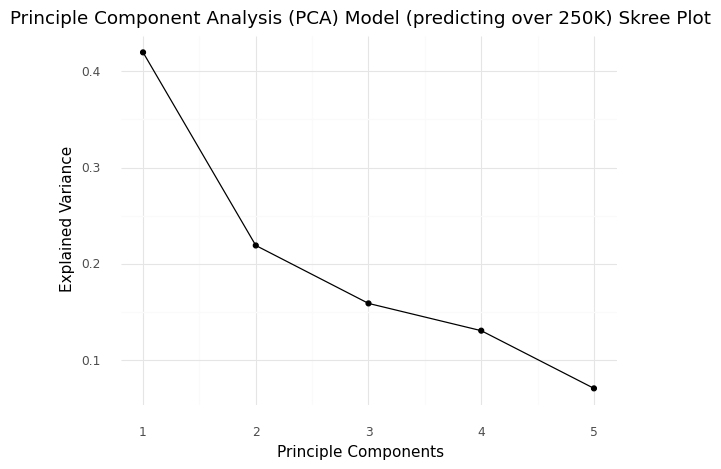

<ggplot: (316836419)>

In [30]:
# pca a scree plot
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Explained_Variance")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting over 250K) Skree Plot") + labs(x = "Principle Components", y = "Explained Variance"))

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 250K:

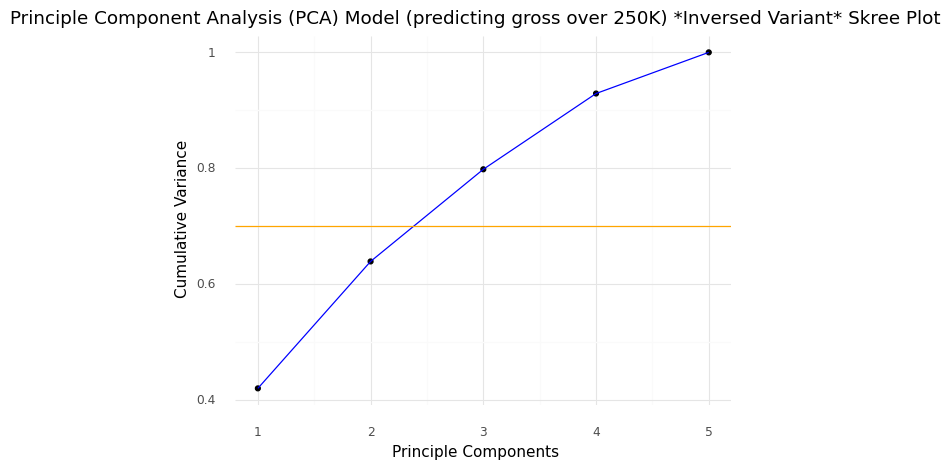

<ggplot: (316843463)>

In [31]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Cumulative_Variance")) + geom_point() + geom_line(color = "blue") + geom_hline(yintercept = 0.70, color = "orange") + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 250K) *Inversed Variant* Skree Plot") + labs(x = "Principle Components", y = "Cumulative Variance"))

### PCA Skree Plots for Model predicting gross over 500K:

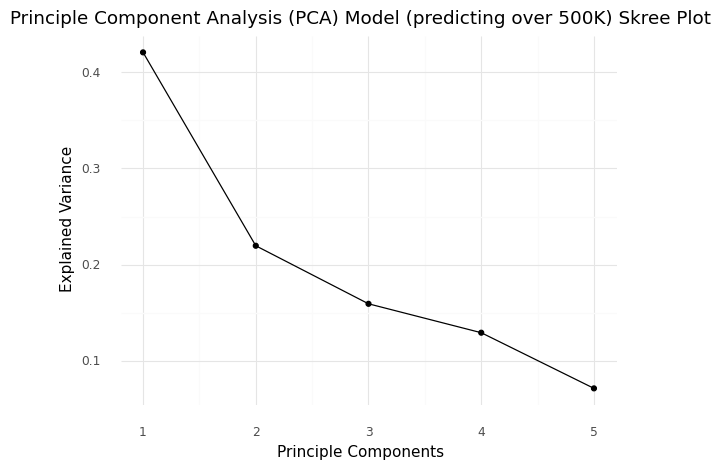

<ggplot: (319007501)>

In [32]:
# pca a scree plot
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Explained_Variance")) + geom_point() + geom_line() + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting over 500K) Skree Plot") + labs(x = "Principle Components", y = "Explained Variance"))

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 500K:

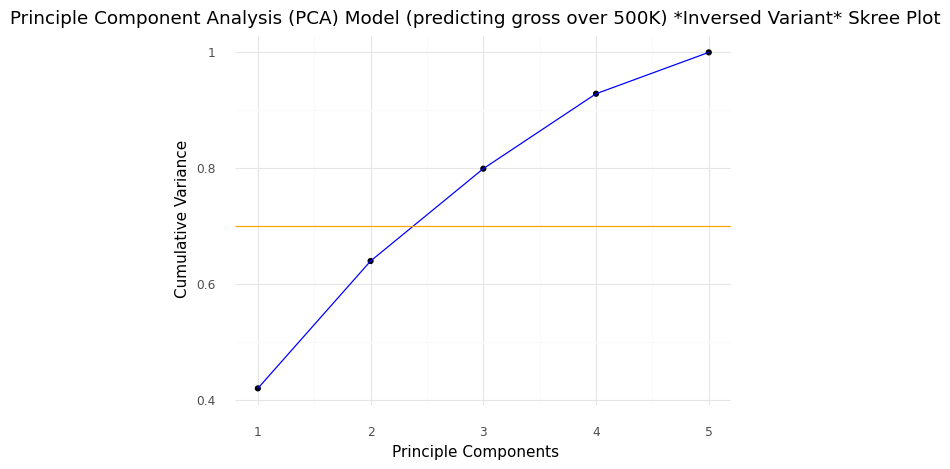

<ggplot: (319061324)>

In [33]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Cumulative_Variance")) + geom_point() + geom_line(color = "blue") + geom_hline(yintercept = 0.70, color = "orange") + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 500K) *Inversed Variant* Skree Plot") + labs(x = "Principle Components", y = "Cumulative Variance"))

In [34]:
# method used to calculate the min number of principle components to achieve the threshold cumulative accuracy
def calc_min_pc(data_frame, col_name, threshold):
    pc_index = 0
    for pc in data_frame[col_name]:
        pc_index += 1
        if pc >= threshold:
            return pc_index

In [35]:
# figuring out how many PCs need to keep to retain 70% of the original variance
min_pc_250k = calc_min_pc(PCA_DF_250k, 'Cumulative_Variance', 0.70)
min_pc_500k = calc_min_pc(PCA_DF_500k, 'Cumulative_Variance', 0.70)

print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_250k) + " Principle Components to predict a movie will gross over 250K with at least 70% accuracy")
print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_500k) + " Principle Components to predict a movie will gross over 500K with at least 70% accuracy")
print("\n")



According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 250K with at least 70% accuracy


According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 500K with at least 70% accuracy




## Creating new LR Models knowing now that we only need 3 principle components
### We are creating these models to ensure that these models are in fact predicting with at least 70% explained variance

In [36]:
mod_PCA_Model_250k = PCA(n_components = min_pc_250k)
mod_PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA(n_components=3)

In [37]:
mod_PCA_Model_500k = PCA(n_components = min_pc_500k)
mod_PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA(n_components=3)

In [38]:
# 250k model
mod_train_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_train_250k)

train_mod_mse_250k = mean_squared_error(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

train_mod_r2_250k = r2_score(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

# 500k model
mod_train_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_train_500k)

train_mod_mse_500k = mean_squared_error(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

train_mod_r2_500k = r2_score(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

In [39]:
print("PCA Model (250k model) MSE (Train): " + str(train_mod_mse_250k))
print("PCA Model (250k model) MSE (Test): " + str(test_mod_mse_250k) + "\n")

print("PCA Model (250k model) r2 (Train): " + str(train_mod_r2_250k))
print("PCA Model (250k model) r2 (Test): " + str(test_mod_r2_250k))

PCA Model (250k model) MSE (Train): 0.11192570869990225
PCA Model (250k model) MSE (Test): 0.1187683284457478

PCA Model (250k model) r2 (Train): -0.11052745238496553
PCA Model (250k model) r2 (Test): -0.12280487804878026


In [40]:
print("PCA Model (500k model) MSE (Train): " + str(train_mod_mse_500k))
print("PCA Model (500k model) MSE (Test): " + str(test_mod_mse_500k) + "\n")

print("PCA Model (500k model) r2 (Train): " + str(train_mod_r2_500k))
print("PCA Model (500k model) r2 (Test): " + str(test_mod_r2_500k))

PCA Model (500k model) MSE (Train): 0.15118931247963507
PCA Model (500k model) MSE (Test): 0.14809384164222875

PCA Model (500k model) r2 (Train): -0.12222124808277868
PCA Model (500k model) r2 (Test): -0.08679257190640732


## Anaylsis Plan
## TODO